# Genetic Algorithm for Smart Charging and Discharging of EVs

This is an attempt to model the smart charging and discharging of EVs using Genetic Algorithm. The dataset used is a 96-point load data curve. The input parameters are:

1.   Duration
2.   Arrival Time
3.   Arrival SOC



In [1074]:
import csv
import matplotlib.pyplot as plt
import random

# Vehicle Distribubtion
Data was collected and sampled from NHTS Survey

48
154


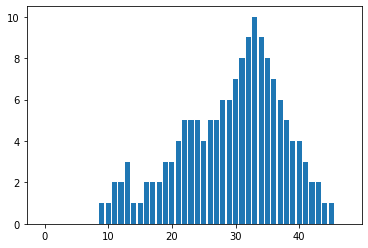

In [1075]:
vehnum=[]
with open('./VPMARRIVAL1MIN.csv','r') as file:
    reader=csv.reader(file)
    i=0
    for row in reader:
        if i !=0 and i%2==0:
            vehnum.append(int(int(row[6])/600))
        i+=1
print(len(vehnum))
# vehnum.sort()
vtot=0
for v in vehnum:
  vtot+=v
# print(vehnum[0],vehnum[95])
print(vtot)
plt.bar(range(len(vehnum)),vehnum)
plt.show()

#Genetic Algorithm

1. Initialization
2. Fitness Calculation
3. Parent Selection
4. Crossover
5. Mutation

Steps 2 through 5 are looped for a fixed number of times.


##Initialization

In [1076]:
def clamp(num, min_value, max_value):
   return max(min(num, max_value), min_value)

In [1077]:
#util
def interval_intersection(interval1, interval2):
    if interval1[1] < interval2[0] or interval2[1] < interval1[0]:
        return []
    else:
        start = max(interval1[0], interval2[0])
        end = min(interval1[1], interval2[1])
        return [start, end]

Naive

In [1078]:
# #initialize population
# import random
# best=-100000
# #parent_econload_gene=([random.randint(300,434) for x in range(5)])
# cars=[]
# soc=[random.uniform(0.8,1)for i in range(154)]
# print(len(soc))
# for t in range(0,48):
#   for i in range(0,vehnum[t]):
#     cars.append({"t":t,"d": random.randint(8,12),"Pev":[0 for x in range(96)]})
# i=0
# print(len(cars))
# for car in cars:
#   for t in range(car["t"],car["t"]+int(4*car["d"])):
#     interval=interval_intersection([-7.2,7.4],[-soc[i][t]*156,156-soc[i][t]*156])

#     if interval !=[]:
#       car["Pev"][t]=random.uniform(interval[0],interval[1])
#       #print(car["Pev"][t])
#   i+=1
# parent_cars_gene=([[random.randint(-1,1) for x in range(65)] for i in range(5)])
# new_populations = []
# print(cars)

In [1079]:
dur=[random.randint(8,12) for x in range(vtot)]
len(dur)

154

Random shuffling of (-1,1)

In [1080]:
#initialize population
from numpy import random
pop=100
#parent_econload_gene=([random.randint(300,434) for x in range(5)])
cars=[[clamp(random.normal(0,1.8),-7.2,7.4)/7.4 for i in range(vtot*96)]for x in range(pop)]
dur=[random.randint(8,12)*4 for x in range(vtot)]
start=[i for i in range(48) for v in range(vehnum[i])]
print(start)
end=[start[i]+dur[i] for i in range(vtot)]
#print(len(start))
soc=[0.0 for x in range(vtot*96) ]
# ebattery=[0.0 for x in range(vtot*96) ]
for j in range(vtot):
    soc[96*j+start[j]]=round(random.uniform(0.8,1),2)
ogsoc=soc

ebattery=[round(soc[96*x+start[x]]*39,2) for x in range(vtot)]
ogebattery=ebattery

t=0
arrival=vehnum+[0 for i in range(48)]
freq={}
for i in end:
  if i in freq:
    freq[i]+=1
  else:
    freq[i]=1
depart=[0 for i in range(96)]
for i in range(96):
  if i in freq:
    depart[i]=freq[i]

vehpresent=[0 for i in range(96)]
vehpresent[0]=arrival[0]-depart[0]

for i in range(1,96):
  vehpresent[i]=vehpresent[i-1]+arrival[i]-depart[i]


[9, 10, 11, 11, 12, 12, 13, 13, 13, 14, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 25, 25, 25, 25, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 39, 39, 39, 39, 40, 40, 40, 40, 41, 41, 41, 42, 42, 43, 43, 44, 45]


In [1081]:
ebattery

[36.27,
 36.27,
 35.1,
 36.66,
 37.83,
 33.93,
 37.44,
 35.49,
 34.32,
 33.54,
 34.32,
 38.61,
 33.54,
 31.59,
 37.83,
 34.32,
 31.98,
 35.49,
 34.71,
 35.1,
 38.61,
 33.93,
 36.27,
 35.88,
 35.88,
 33.93,
 32.37,
 37.05,
 37.05,
 33.93,
 39.0,
 33.93,
 37.83,
 32.76,
 38.61,
 37.44,
 32.76,
 37.05,
 35.1,
 37.05,
 37.05,
 31.59,
 33.15,
 34.71,
 36.66,
 35.88,
 32.76,
 38.22,
 33.93,
 31.59,
 37.83,
 38.61,
 32.76,
 35.1,
 35.1,
 35.1,
 33.15,
 37.05,
 35.1,
 32.76,
 38.22,
 37.44,
 33.54,
 31.2,
 38.61,
 39.0,
 35.49,
 34.32,
 37.83,
 36.66,
 33.54,
 35.88,
 34.32,
 31.98,
 38.61,
 37.83,
 35.49,
 39.0,
 31.2,
 31.98,
 33.54,
 38.61,
 37.44,
 37.44,
 32.37,
 31.2,
 37.44,
 32.76,
 32.37,
 36.27,
 36.27,
 35.88,
 31.98,
 38.22,
 33.15,
 31.98,
 35.1,
 33.93,
 37.05,
 35.88,
 39.0,
 37.83,
 31.59,
 36.27,
 37.83,
 37.05,
 33.54,
 33.15,
 34.71,
 35.88,
 35.1,
 35.1,
 36.27,
 31.2,
 34.32,
 35.1,
 31.2,
 35.1,
 35.1,
 31.98,
 31.2,
 34.71,
 39.0,
 31.59,
 32.37,
 31.2,
 31.2,
 35.1,
 38

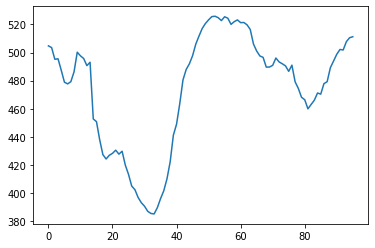

In [1082]:
P_load=[]
with open('./loadcurve.csv','r') as file:
    reader=csv.reader(file)
    i=0
    for row in reader:
        if i !=0:
            P_load.append(float(row[4]))
        i+=1

plt.plot(P_load)


##Fitness Score Calculation

In [1083]:

import numpy as np

def fitness():
  global cars, P_load,fit_value,soc_value,best_fitness,p_ev
  best_fitness=-100000
  pev=7.4
  fit_value=[]
  soc_value=[]
  for i in range(0,pop):
    obj_fun=0
    P_econload=450
    reward=0
    soc=ogsoc
    ebattery=ogebattery
    for t in range(0,96):
        sum_pev=0
        for j in range(0,vtot):
            if start[j]<t and t<=end[j]:
              val=ebattery[j]+cars[i][t*vtot+j]*pev/4
              if round(val,2)>=0.2*39 and round(val,2)<39:
                ebattery[j]=round(val,2)
                sum_pev+=cars[i][t*vtot+j]*pev
                soc[96*j+t]=round((ebattery[j])/39,2)
          
            if t==end[j]:
              # print(soc[96*j+end[j]])
              if 0.7<=soc[96*j+end[j]]<=1:
                # print(2) 
                reward+=0.5
              if 0.6<=soc[96*j+end[j]]<0.7:
                reward+=0.3
              if 0.4<soc[96*j+end[j]]<0.6:
                reward+=0.1
            if t>end[j]:
              soc[96*j+t]=soc[96*j+end[j]]
        # print(P_load[t]-P_econload,sum_pev)
        obj_fun+=(P_load[t]-P_econload+sum_pev)
      
    fitness_score=1/(obj_fun+1e-8)
    # print("fitness:",fitness_score)
    # print("reward:", reward)
    # fitness_score=fitness_score+reward/100
    #1000 worked well
    fit_value.append(fitness_score)
    soc_value.append(soc)

    


In [1084]:
#selecting parents....

def selectparent():
    global fit_value,parents,best_soc,best_fitness
    parents =[[0 for i in range(vtot*96)]for j in range(2*pop)]
    best_soc=[0 for i in range(vtot*96)]
    max_fitness_idx= np.argmax(fit_value)
    best_fitness=fit_value[max_fitness_idx]
    best_soc=soc_value[max_fitness_idx]
    # print(max(fit_value),best_fitness)
    # best_fit_index=-1
    # for parent_num in range(500):

    #     max_fitness_idx_arr = np.where(fit_value == np.max(fit_value))
    #     max_fitness_idx = max_fitness_idx_arr[0][0]
        
    #     parents[parent_num] = cars[max_fitness_idx]
    #     if best_fitness<fit_value[max_fitness_idx]:
    #         best_fitness=max(fit_value[max_fitness_idx],best_fitness)
    #         best_fit_index=max_fitness_idx
        
    #     fit_value[max_fitness_idx] = -99999999999
    # best_soc = soc_value[best_fit_index]
    tot_fit=sum(fit_value)
    probs=[i/tot_fit for i in fit_value]
    probs = sorted([(i, f/tot_fit) for i, f in enumerate(fit_value)], key=lambda p: p[1], reverse=True)
    
    for i in range(2*pop):
        x=random.uniform(0,1)
        j=0
        while(x>=probs[j][1]):
           x-=probs[j][1]
           j+=1
        parents[i]=cars[probs[j-1][0]]
    # print(len(parents))
# selectparent()
#print(len(parents))

## Crossover

In [1085]:
# import numpy as np
# def PMX_crossover(parent1, parent2, seed):
#     '''
#     parent1 and parent2 are 1D np.array
#     '''
#     rng = np.random.default_rng(seed=seed)

#     cutoff_1, cutoff_2 = np.sort(rng.choice(np.arange(len(parent1)+1), size=2, replace=False))

#     def PMX_one_offspring(p1, p2):
#         offspring = np.zeros(len(p1), dtype=p1.dtype)

#         # Copy the mapping section (middle) from parent1
#         offspring[cutoff_1:cutoff_2] = p1[cutoff_1:cutoff_2]

#         # copy the rest from parent2 (provided it's not already there
#         for i in np.concatenate([np.arange(0,cutoff_1), np.arange(cutoff_2,len(p1))]):
#             candidate = p2[i]
#             while candidate in p1[cutoff_1:cutoff_2]: # allows for several successive mappings
#                 print(f"Candidate {candidate} not valid in position {i}") # DEBUGONLY
#                 candidate = p2[np.where(p1 == candidate)[0][0]]
#             offspring[i] = candidate
#         return offspring

#     offspring1 = PMX_one_offspring(parent1, parent2)
#     offspring2 = PMX_one_offspring(parent2, parent1)
#     parents=parents+offspring1
#     parents=parents+offspring2

#     return offspring1, offspring2


# newcars=parents

In [1086]:
from operator import add,sub
def crossover():
     global parents,offspring 
     offspring = [[0 for i in range(vtot*96)]for j in range(pop)]
     # The point at which crossover takes place between two parents. Usually, it is at the center.
     
 
     for k in range(pop):
         # Index of the first parent to mate.
         pshape=1000
         parent1_idx = 2*k
         # Index of the second parent to mate.
         parent2_idx = 2*k+1
         crossover_point = random.randint(0,vtot)
         for i in range(96):
         # The new offspring will have its first half of its genes taken from the first parent.
          offspring[k][i*vtot:(i*vtot+crossover_point)] = parents[parent1_idx][i*vtot:(i*vtot+crossover_point)]
         # The new offspring will have its second half of its genes taken from the second parent.
          offspring[k][(i*vtot+crossover_point):(i*vtot+vtot)] = parents[parent2_idx][(i*vtot+crossover_point):(i*vtot+vtot)]
#crossover()
#print(parents)
    

In [1087]:
def mutation():
    global offspring
    for i,off in enumerate(offspring) :
        # The random value to be added to the gene.
          mut_val=0.001
          for j,g in enumerate(off):
            if random.uniform(0,1)<mut_val:
         
                offspring[i][j] = clamp(random.normal(0,1.8),-7.2,7.4)/7.4
    return offspring
#mutation()

In [1088]:
global parents,best,offspring
new_pop=[[0 for i in range(vtot*96)]for j in range(pop)]
best=[]
count=0
for i in range(0,10):
    if count>=10:
      break
    if len(best)>=2 and abs(best[i-2]-best[i-1])<0.5:
      count+=1
    elif len(best)>=2 and  abs(best[i-2]-best[i-1])>=0.5:
      count=0
      
    fitness()
    selectparent() 
    crossover()
    offspring_mutation=mutation()
    new_pop = offspring_mutation
    cars=new_pop
    # print(len(cars))
    print("best",i,":",best_fitness)
    best.append(best_fitness)
    # print(fit_value[0])

best 0 : 0.0005499575592978876
best 1 : 0.0005156226554361612
best 2 : 0.0005006594319841457
best 3 : 0.000495222889304877
best 4 : 0.0004954226848971746
best 5 : 0.0004903185384567294
best 6 : 0.000496464685916503
best 7 : 0.00048314549905379973
best 8 : 0.00048536246337735117
best 9 : 0.0004959970869485895


In [1089]:
len(best_soc)/85

173.9294117647059

96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96


<function matplotlib.pyplot.show(close=None, block=None)>

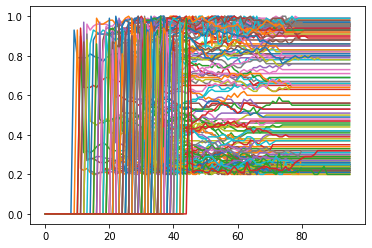

In [1091]:
for j in range(vtot):
    plt.plot(best_soc[j*96:j*96+96])
plt.show